In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  #Autoregressive integrated moving average
from sklearn.metrics import mean_squared_error

In [5]:
# load the data
data = pd.read_csv('stock_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [7]:
# conver date to date_time
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# date as a index set
data.set_index('Date', inplace=True)

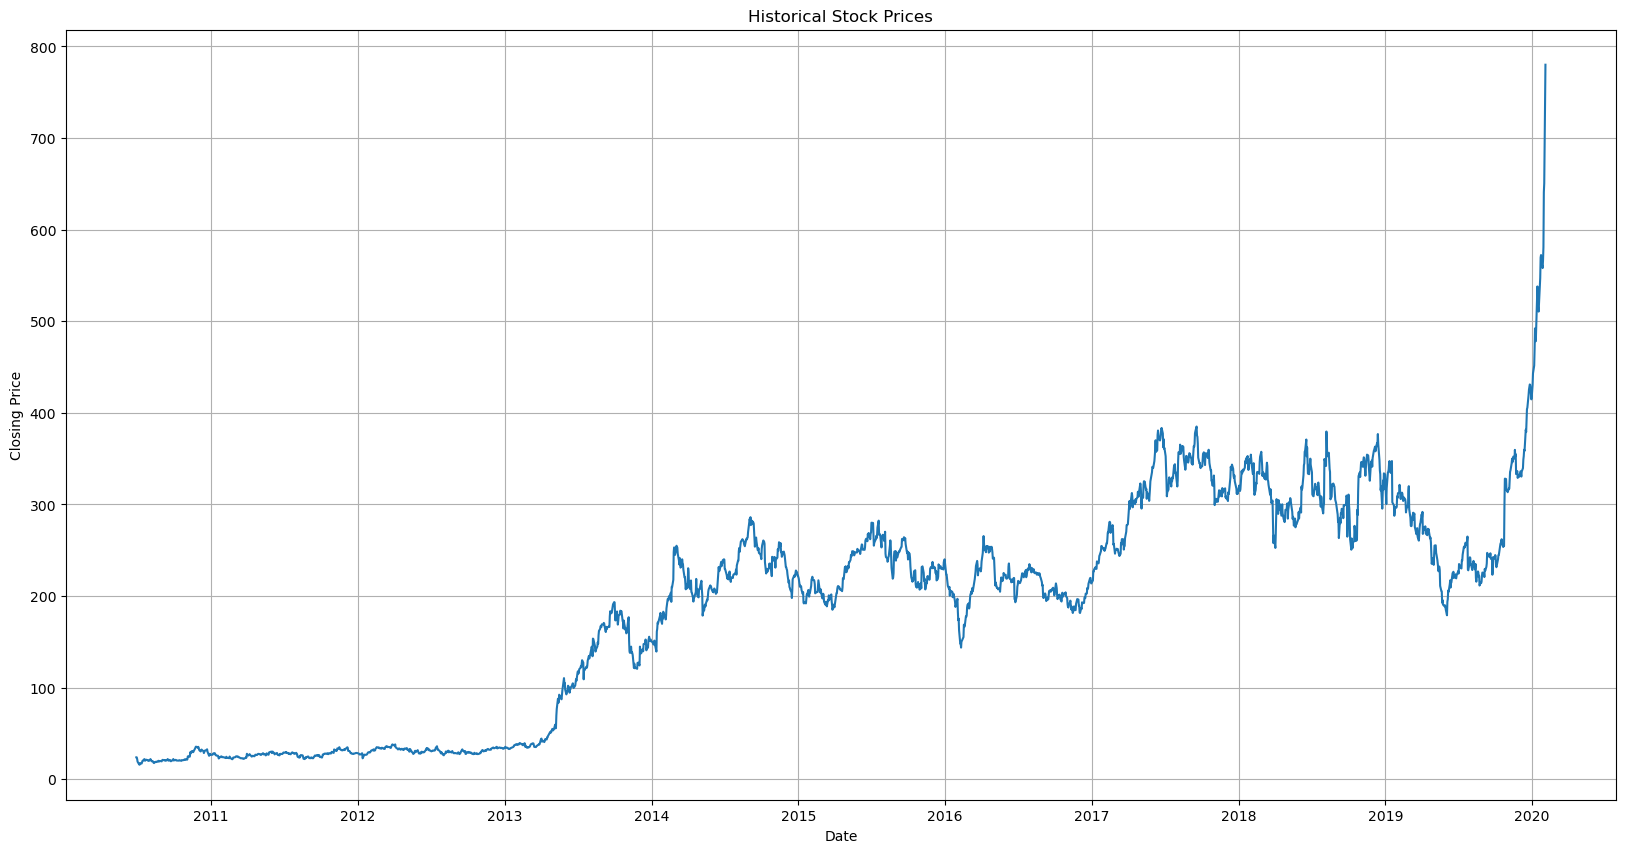

In [15]:
# previous stock price
plt.figure(figsize=(20, 10))
plt.plot(data['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [10]:
# split 80/20 data
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [11]:
# train arima model
model = ARIMA(train_data['Close'], order=(5,1,0))
fitted_model = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# make prediction
predictions = fitted_model.forecast(steps=len(test_data))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:
# calculate mean square error
mse = mean_squared_error(test_data['Close'], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 5979.664371961546


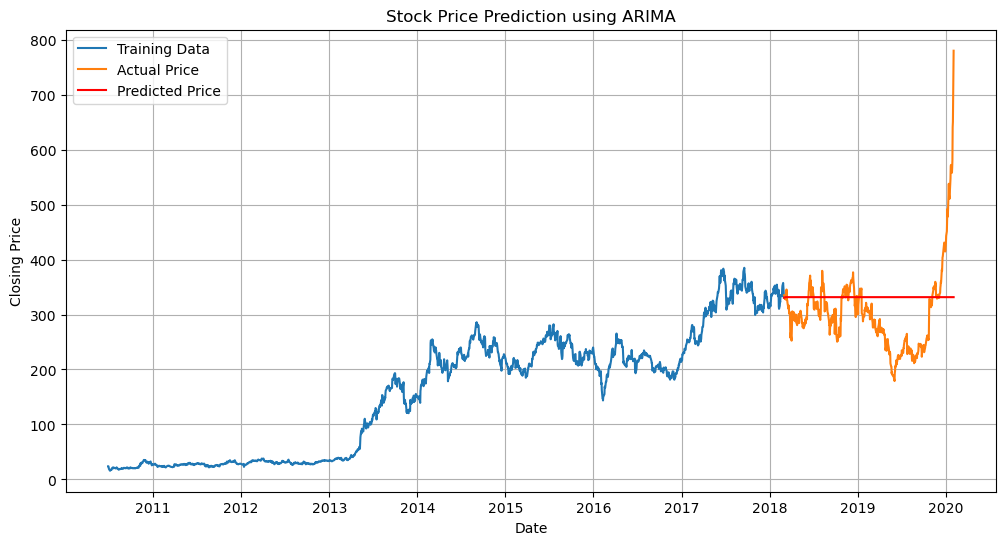

In [14]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

Random Forest Mean Squared Error: 1439.3609705747494
KNN Mean Squared Error: 14576.06278682033


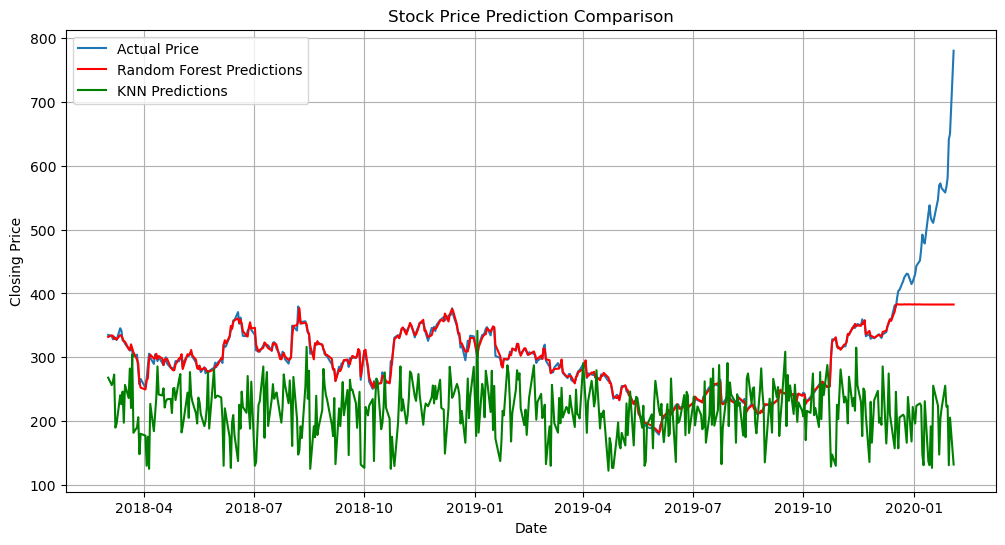

In [16]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature selection (example)
features = ['Open', 'High', 'Low', 'Volume']  # Adjust features as needed

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_data[features], train_data['Close'])

# Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_data[features], train_data['Close'])

# Make predictions
rf_predictions = rf_model.predict(test_data[features])
knn_predictions = knn_model.predict(test_data[features])

# Evaluate performance
rf_mse = mean_squared_error(test_data['Close'], rf_predictions)
knn_mse = mean_squared_error(test_data['Close'], knn_predictions)

print("Random Forest Mean Squared Error:", rf_mse)
print("KNN Mean Squared Error:", knn_mse)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Price')
plt.plot(test_data.index, rf_predictions, label='Random Forest Predictions', color='red')
plt.plot(test_data.index, knn_predictions, label='KNN Predictions', color='green')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [19]:

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


In [21]:

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(train_data[features], train_data['Close'])

# Perform grid search for KNN
knn_grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid_search.fit(train_data[features], train_data['Close'])



GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [22]:
# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_
best_knn_params = knn_grid_search.best_params_

# Train Random Forest with best parameters
rf_best_model = RandomForestRegressor(**best_rf_params, random_state=42)
rf_best_model.fit(train_data[features], train_data['Close'])

# Train KNN with best parameters
knn_best_model = KNeighborsRegressor(**best_knn_params)
knn_best_model.fit(train_data[features], train_data['Close'])

# Make predictions
rf_predictions = rf_best_model.predict(test_data[features])
knn_predictions = knn_best_model.predict(test_data[features])

# Evaluate performance
rf_mse = mean_squared_error(test_data['Close'], rf_predictions)
knn_mse = mean_squared_error(test_data['Close'], knn_predictions)

print("Random Forest Mean Squared Error:", rf_mse)
print("KNN Mean Squared Error:", knn_mse)


Random Forest Mean Squared Error: 1442.3670449653966
KNN Mean Squared Error: 14426.99683533047
